# Oppgave 2

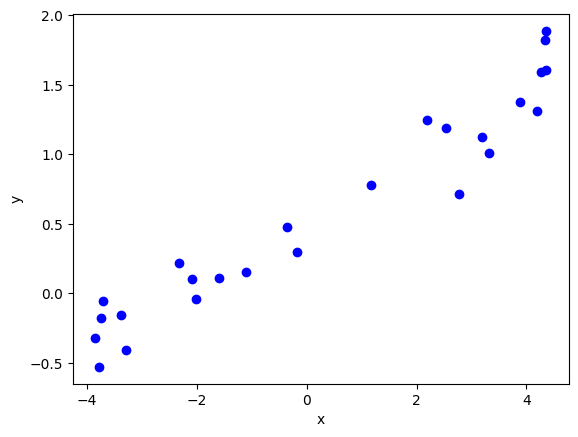

In [11]:
# Du trenger ikke endre noe i denne koden!

import numpy as np
#from scipy.stats import norm
import matplotlib.pyplot as plt

#Initialisering av parameterverdier
n = 25
alpha = 0.5
beta = 0.25
sigma = 0.25

#Simulering av data etter modell
# x_1,x_2,...,x_n i intervallet [-5,5]
x = np.array([-3.842, -3.784, -3.745, -3.708, -3.37,  -3.288, -2.312, -2.078, -2.019, 
              -1.595,-1.106, -0.352, -0.171,  1.166,  2.196,  2.538,  2.772,  3.186,  
              3.309,3.876, 4.2,    4.261,  4.337,  4.352,  4.359])
# genererer tilhørende verdier for y_1,y_2,...,y_n
y = alpha + beta * x + np.random.normal(loc=0,scale=sigma,size=n) 

#Visualiserer resultatet i et plott
plt.plot(x,y,'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
# Du trenger ikke endre noe i denne koden!

def estimerELR(x,y):
    #Beregner gjennomsnitt
    xStrek = np.mean(x)
    yStrek = np.mean(y)
    #Estimater for parametere
    betaHat = np.sum((x-xStrek)*y)/np.sum((x-xStrek)**2)
    alphaHat = yStrek - betaHat * xStrek
    S2 = np.sum((y-(alphaHat+betaHat*x))**2)/(len(x)-2)
    #Returnerer resultatet i en liste
    return [alphaHat,betaHat,S2]

paramHat = estimerELR(x,y)
print('alphaHat: ',paramHat[0])
print('betaHat: ',paramHat[1])
print('s2: ',paramHat[2])     

alphaHat:  0.5287753605148057
betaHat:  0.2290899323779839
s2:  0.03943569537034419


# 2a

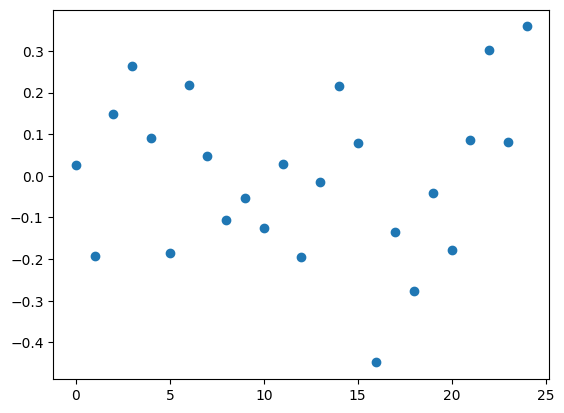

In [30]:
alphaHat = paramHat[0]
betaHat = paramHat[1]
s2 = paramHat[2]

residualer = np.zeros(len(x))
for i in range(len(x)):
    y_hat = alphaHat + betaHat*x[i]
    residualer[i] = y[i] - y_hat

x_axis = np.arange(0,len(x),1)
plt.scatter(x_axis, residualer)

alphaHat:  0.6978741196416692
betaHat:  0.27048449769385935
s2:  0.029365631880594555


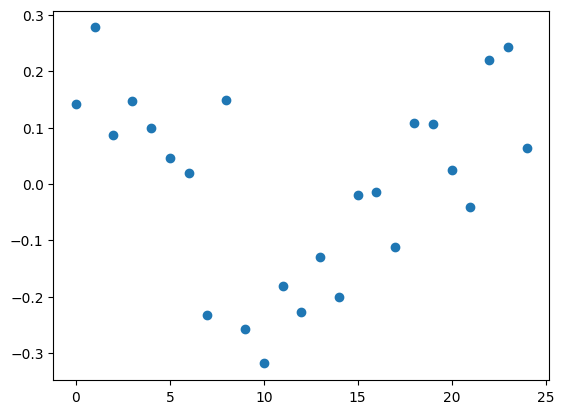

In [52]:
y = 0.5 + 0.25 * x + 0.02*x**2 + np.random.normal(loc=0,scale=0.10,size=n)

paramHat = estimerELR(x,y)
print('alphaHat: ',paramHat[0])
print('betaHat: ',paramHat[1])
print('s2: ',paramHat[2]) 

alphaHat = paramHat[0]
betaHat = paramHat[1]
s2 = paramHat[2]

residualer = np.zeros(len(x))
for i in range(len(x)):
    y_hat = alphaHat + betaHat*x[i]
    residualer[i] = y[i] - y_hat

x_axis = np.arange(0,len(x),1)
plt.scatter(x_axis, residualer)

Ser at residualene har en ikke-lineær trend og ser ut å følge en positiv parabel.

# Oppgave 4

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.array([24.7,24.8,27.3,28.4,28.4,29.0,30.3,32.7,35.6,38.5,38.8,39.3,39.4,39.9,40.3,40.6,40.7,40.7,
              42.9,45.8,46.9,48.2,51.5,51.5,53.4,56.0,56.5,57.3,57.6,59.2,59.8,66.0,67.4,68.8,69.1,69.1])
y = np.array([484,427,413,517,549,648,587,704,979,914,1070,1020,1210,989,1160,1010,1100,1130,1270,1180,
              1400,1760,1710,2010,1880,1980,1820,2020,1980,2310,1940,3260,2700,2890,2740,3140])

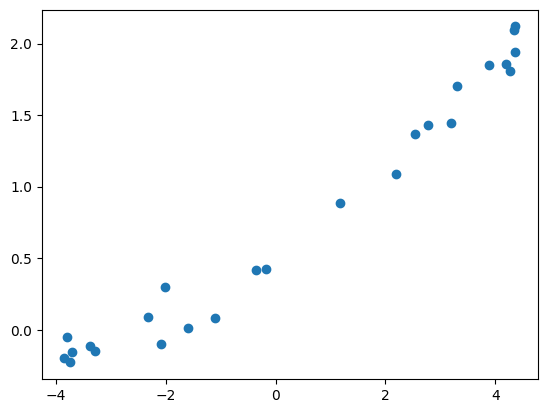

In [53]:
plt.scatter(x,y)

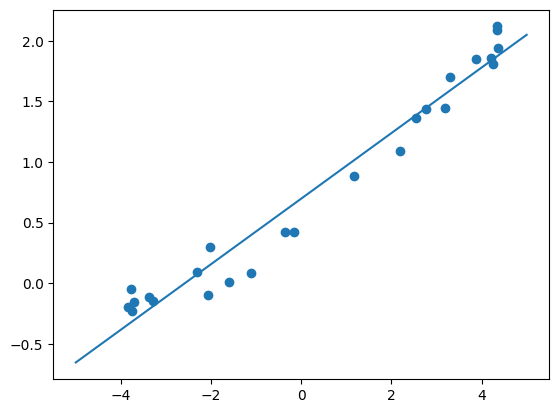

In [61]:
parametere = estimerELR(x,y)
t = np.arange(-5,6,1)
y_hat = parametere[0] + parametere[1]*t

plt.scatter(x,y)
plt.plot(t,y_hat)

alphaHat:  0.6978741196416692
betaHat:  0.27048449769385935
s2:  0.029365631880594555


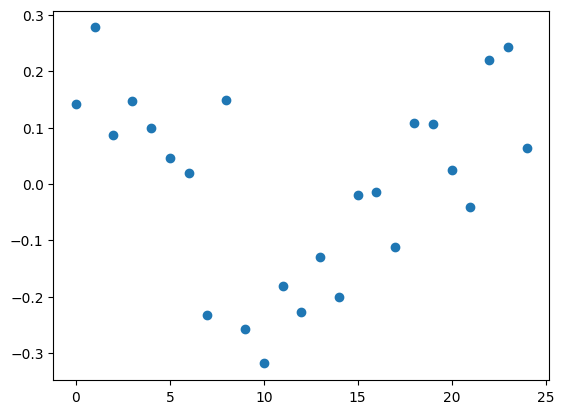

In [63]:
parametere = estimerELR(x,y)
print('alphaHat: ',parametere[0])
print('betaHat: ',parametere[1])
print('s2: ',parametere[2]) 

alphaHat = parametere[0]
betaHat = parametere[1]
s2 = parametere[2]

residualer = np.zeros(len(x))
for i in range(len(x)):
    y_hat = alphaHat + betaHat*x[i]
    residualer[i] = y[i] - y_hat

x_axis = np.arange(0,len(x),1)
plt.scatter(x_axis, residualer)

Disse passer dårlig. Tyder på at det ikke er en lineær sammenheng mellom variablene.

La oss gjør en hypotesetest hvor $$ H_0: alpha = 0 $$ og $$ H_1: alpha \neq 0 $$

siden vi har n=25 og ukjent varians, bruker vi t-test. Vi har en tosidig test og når vi da har $$ a = 0.1 $$, får vi $$ t_{0.05,25} = 2.06 $$

In [70]:
a_hat = parametere[0]

std = y.std(ddof=1)

T_obs = (a_hat - 0) / (std / np.sqrt(n))

t_alpha = 2.06

if (T_obs > t_alpha):
    print("Forkast H0")
elif (T_obs < t_alpha):
    print("Forkast H0")
else:
    print("Behold H0")

Forkast H0
